Introduction :
The objective of this project is to compare various data mining techniques for detecting defaults. In a well-developed financial system, crisis management is reactive, while risk prediction is proactive. The primary goal of risk prediction is to utilize financial data—such as business financial statements, customer transaction histories, and repayment records—to forecast business performance or assess the credit risk of individual customers, thereby mitigating potential damage and uncertainty.

Data mining involves the exploration and analysis, either automatically or semi-automatically, of large datasets to uncover meaningful patterns and rules.

When a customer accepts a credit card from a bank or issuer, they agree to specific terms and conditions, including the obligation to make at least the minimum payment by the due date specified on their credit card statements. If the customer fails to meet this obligation, the issuer may classify the account as in default, impose a penalty rate, reduce the credit limit, and, in cases of significant delinquency, potentially close the account.

This project will explore and evaluate different data mining methodologies to enhance the detection of defaults, ultimately contributing to more effective risk management within financial systems.


In [1]:
# Import the warnings module to manage warning messages in Python
import warnings
# Ignore all warnings in the script to prevent them from being displayed
warnings.simplefilter(action="ignore")

In [2]:
# Install the wget package, which allows downloading files from the web
!pip install wget
# Install the fitter package, which is used for distribution fitting in data analysis
!pip install fitter
# Import the wget module to use its functionality for downloading files
import wget
# Download a file from a specified URL and save it locally as 'default.tar.gz'
wget.download('https://github.com/APS1070-W23/datasets/raw/main/default.tar.gz', 'default.tar.gz')
# Extract the contents of the 'default.tar.gz' archive using the tar command
!tar -zxvf default.tar.gz

x ./
x ./default.csv


In [3]:
import pandas as pd
import numpy as np


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA



# Classifier
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB



# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv('default.csv')

#### Exploratory Data Analysis

The data can be downloaded from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients, contains the information of 30000 clients of a bank in Taiwan.

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30000 non-null  int64
 1   X1          30000 non-null  int64
 2   X2          30000 non-null  int64
 3   X3          30000 non-null  int64
 4   X4          30000 non-null  int64
 5   X5          30000 non-null  int64
 6   X6          30000 non-null  int64
 7   X7          30000 non-null  int64
 8   X8          30000 non-null  int64
 9   X9          30000 non-null  int64
 10  X10         30000 non-null  int64
 11  X11         30000 non-null  int64
 12  X12         30000 non-null  int64
 13  X13         30000 non-null  int64
 14  X14         30000 non-null  int64
 15  X15         30000 non-null  int64
 16  X16         30000 non-null  int64
 17  X17         30000 non-null  int64
 18  X18         30000 non-null  int64
 19  X19         30000 non-null  int64
 20  X20         30000 non-null  

No missing feature is recorded for any of the 30.000 samples.

23 variables , 30000 rows, Y is the target :  credit card holders are defaulters or non-defaulters (1=yes, 0=no) , all features are integers


X1 to X5 are client personal information: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).


- X6–X11 : delay of the past payment: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; …; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: −1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; …; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


- X12–X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; …; X17 = amount of bill statement in April, 2005.


- X18–X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; …; X23 = amount paid in April, 2005.

In [6]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##### Data Cleaning

In [7]:
# first column does not contain useful information, so drop it.
df.drop(columns=["Unnamed: 0"], inplace = True)

In [8]:
# Gender Columns
df["X2"].value_counts().sort_index()

1    11888
2    18112
Name: X2, dtype: int64

In [9]:
# we have more than 4 categories for Education
df["X3"].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: X3, dtype: int64

EDUCATION columns have more than four categories, so I will replace categories 0,5 and 6 with 4 (others).

In [10]:
# more than 3 categories in Marital Status
df["X4"].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: X4, dtype: int64

3 categories for X4 is defined so I replace 0 with 3.

In [11]:
# replace 0,5,6 in df['X3'] with 4
# replace 0 in df["X4"] with 3
df["X3"] = df["X3"].replace([0,5,6], 4)
df["X4"] = df["X4"].replace(0, 3)

In [12]:
ranges = df.agg([min,max])
ranges

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
min,10000,1,1,1,21,-2,-2,-2,-2,-2,...,-170000,-81334,-339603,0,0,0,0,0,0,0
max,1000000,2,4,3,79,8,8,8,8,8,...,891586,927171,961664,873552,1684259,896040,621000,426529,528666,1


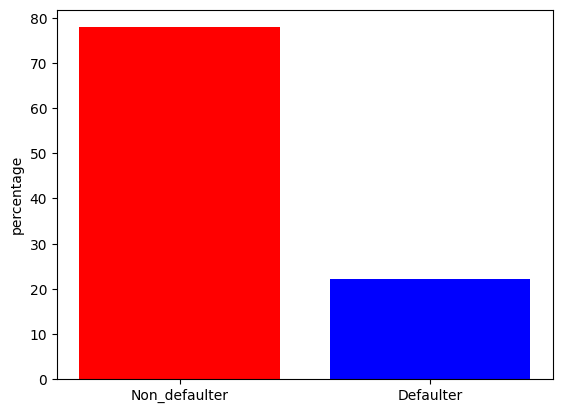

In [13]:
x = ["Non_defaulter","Defaulter"]
y = df["Y"].value_counts(normalize = True)*100
plt.bar(x,y,color = ["red","blue"])
plt.ylabel("percentage")
plt.show()

 It is a binary classification problem on a relatively unbalanced dataset

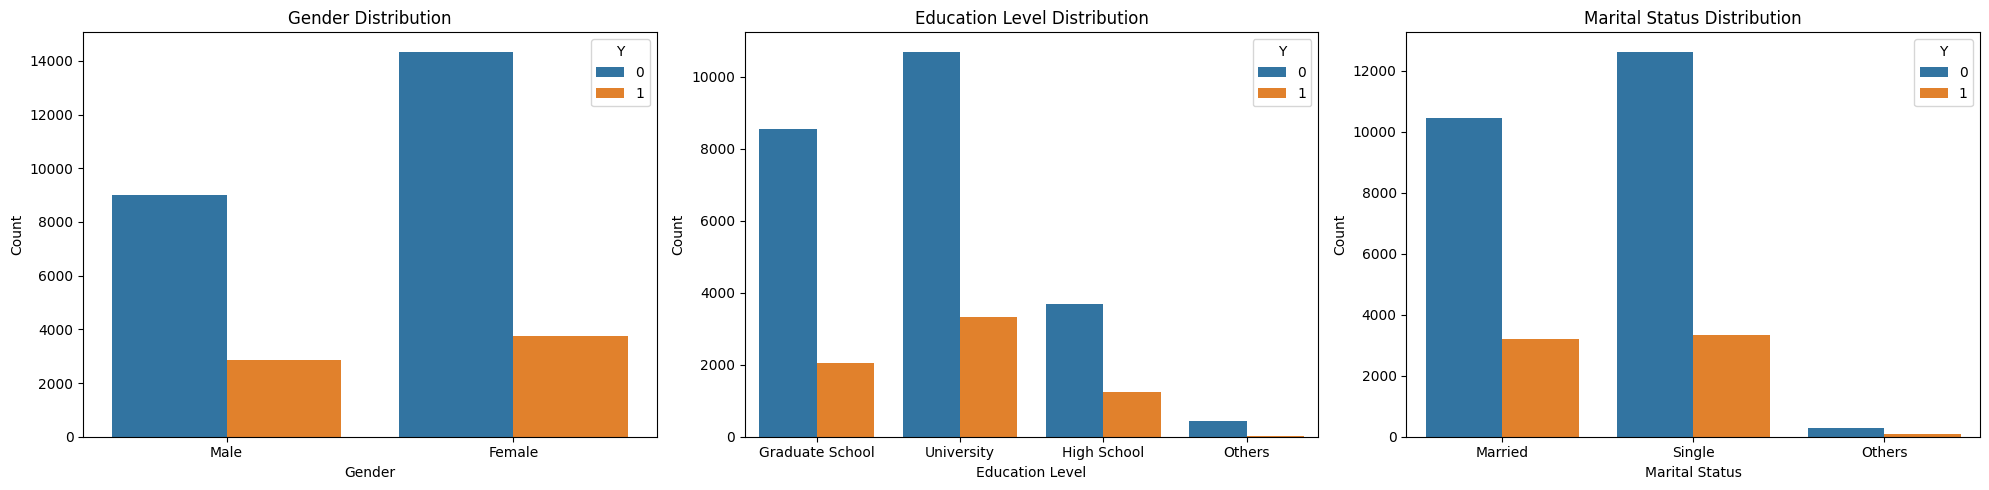

In [14]:
# distribution of gender, maritial status and education in dfifferent classes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot count plot for X2
sns.countplot(x="X2", hue="Y", data=df, ax=axs[0])
axs[0].set_xticklabels(["Male", "Female"])
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Count")
axs[0].set_title("Gender Distribution")

# Plot count plot for X3
sns.countplot(x="X3", hue="Y", data=df, ax=axs[1])
axs[1].set_xticklabels(["Graduate School", "University", "High School", "Others"])
axs[1].set_xlabel("Education Level")
axs[1].set_ylabel("Count")
axs[1].set_title("Education Level Distribution")

# Plot count plot for X4
sns.countplot(x="X4", hue="Y", data=df, ax=axs[2])
axs[2].set_xticklabels(["Married", "Single", "Others"])
axs[2].set_xlabel("Marital Status")
axs[2].set_ylabel("Count")
axs[2].set_title("Marital Status Distribution")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

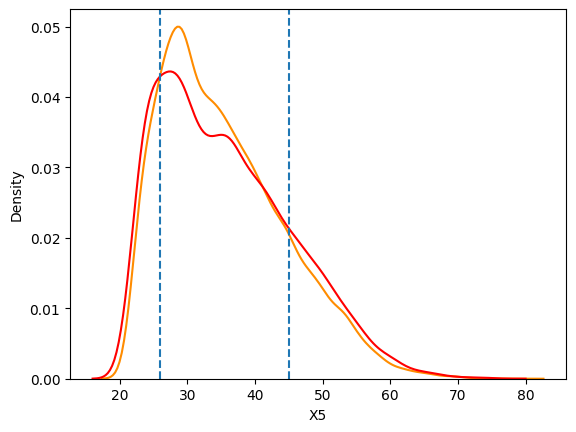

In [15]:
# Probability density of default and non-default clients with respect to their age.
sns.kdeplot(df[df["Y"]==0]["X5"], label = "Non_Default", color = "darkorange" )
sns.kdeplot(df[df["Y"]==1]["X5"], label = "Defaul",color = "red");
plt.axvline(26,ls="--")
plt.axvline(45,ls="--");

The probability of non_default of clients between 26 and 40 is higher than the default of this age group. 

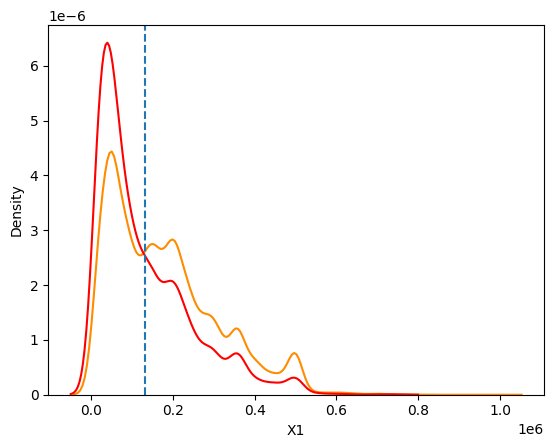

In [16]:
# Probability density of default and non-default clients with respect to Amount of the given credit .
sns.kdeplot(df[df["Y"]==0]["X1"], label = "Non_Default", color = "darkorange" )
sns.kdeplot(df[df["Y"]==1]["X1"], label = "Defaul",color = "red");
plt.axvline(0.132*1e6, ls = "--");

when the bank pays more than 132000$ credit to clients, it is more porbable to default.

##### Data Visualization

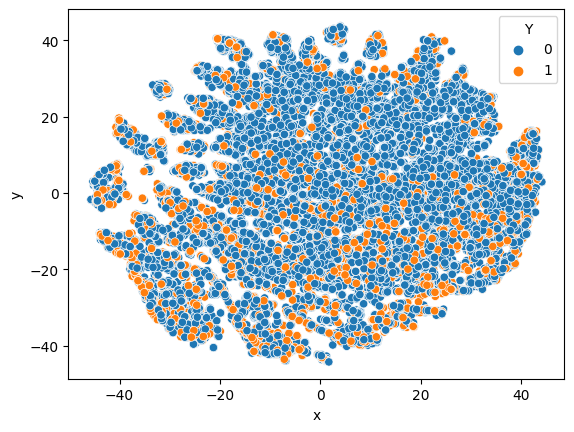

In [17]:
# use TSNE to visualise data and have a general idea how the data is distributed
df_tsne = df.copy()
m = TSNE (learning_rate = 50)
tsne_features = m.fit_transform(df_tsne)
df_tsne["x"]=tsne_features [:, 0]
df_tsne["y"]=tsne_features [:, 1]
sns.scatterplot(x="x",y="y",hue="Y", data = df_tsne)
plt.show()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
X2,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
X3,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
X4,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
X5,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
X6,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
X7,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
X8,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
X9,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
X10,-0.249411,-0.055064,0.104088,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


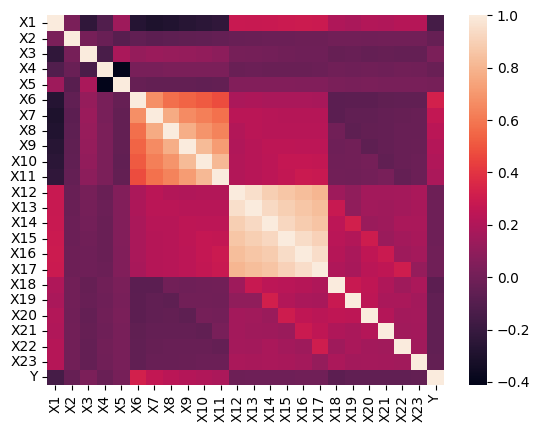

In [18]:
# check for collinearity
sns.heatmap(df.corr())
df.corr()

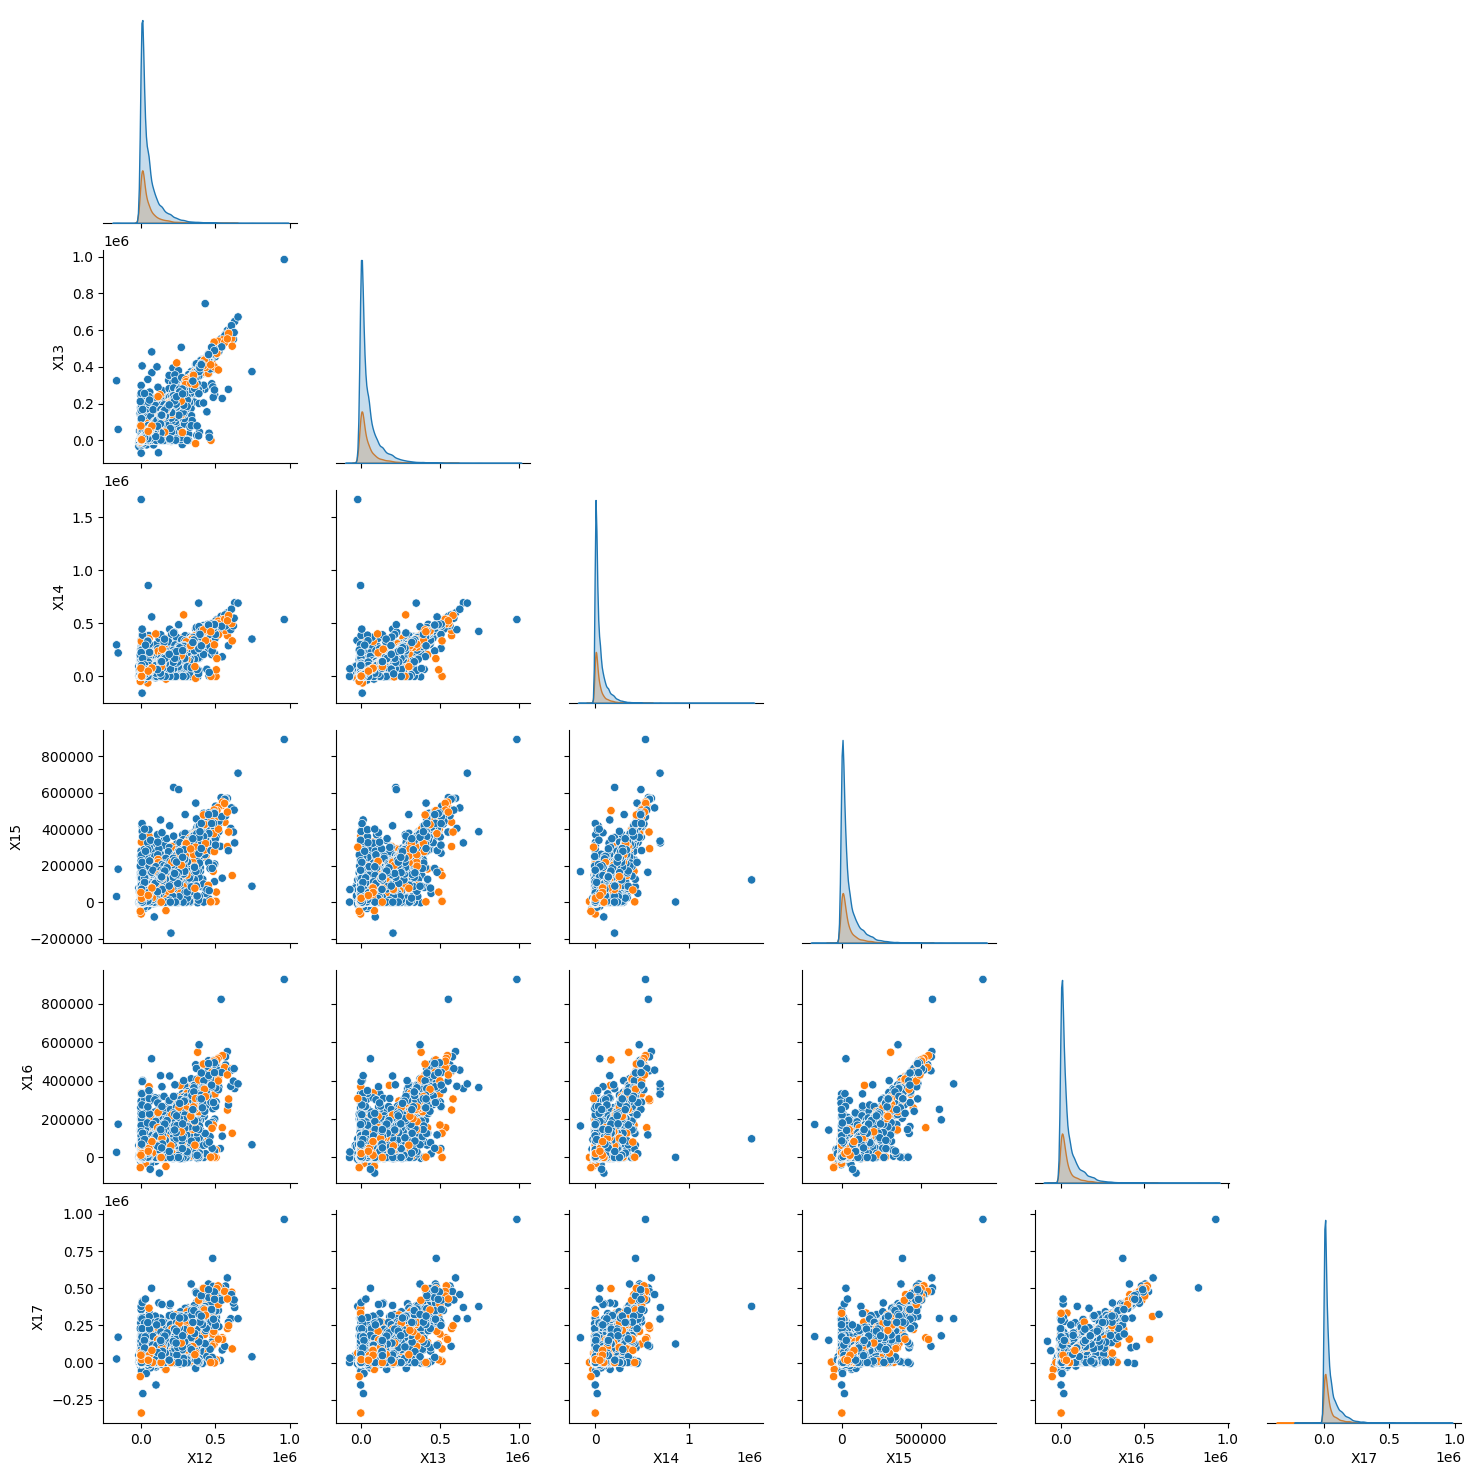

In [19]:
pair_plot = sns.pairplot(df[['X12','X13','X14','X15','X16','X17','Y']], hue='Y', diag_kind='kde', corner=True)
pair_plot._legend.remove()

<Axes: >

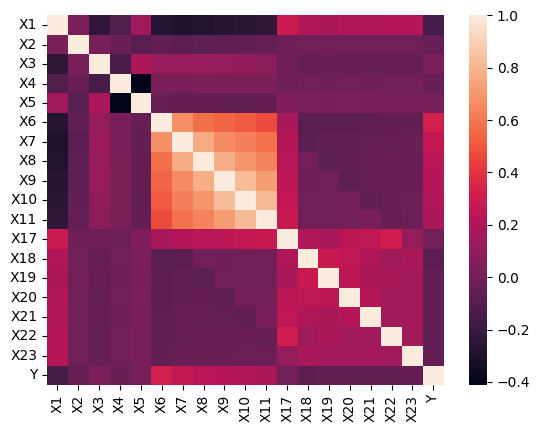

In [20]:
# drop columns with high collinearity , X12, X13, X14, X15, X16
df.drop(columns = ["X12","X13","X14","X15","X16"], inplace = True)
sns.heatmap(df.corr())

#### Data Preprocessing

##### Handling Categorical Data

In [21]:
columns_to_encode = ['X2', 'X3','X4']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
data = df.drop(columns=columns_to_encode)
df = pd.concat([data, encoded_df], axis=1)
df.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X17,X18,...,Y,X2_1,X2_2,X3_1,X3_2,X3_3,X3_4,X4_1,X4_2,X4_3
0,20000,24,2,2,-1,-1,-2,-2,0,0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,120000,26,-1,2,0,0,0,2,3261,0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,90000,34,0,0,0,0,0,0,15549,1518,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,50000,37,0,0,0,0,0,0,29547,2000,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,50000,57,-1,0,-1,0,0,0,19131,2000,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# The recommended approach is to normalize the data after splitting it into training and testing sets.
# The rationale behind this recommendation is to prevent any information leakage from the testing set into the training
# set, which can lead to over-optimistic results and unrealistic performance evaluations.

def Normalization (df):
    scalar = StandardScaler()
    scalar.fit(df)
    df_norm = scalar.transform(df)
    dfNorm = pd.DataFrame(data=df_norm, columns=df.columns)
    return dfNorm

##### Split Data and Normalization

In [23]:
#  split the dataset into a training (70%), validation (15%) and testing set (15%).

# separate out the column corresponding to the targets
X = df.drop(columns = ["Y"])
y = pd.DataFrame(data=df["Y"])

# split the dataset into a training (70%) and testing set (15%). Set the random state to 0.
# random_state=0 or any other fixed integer: The function will produce the same split every time you run the code,
# making your experiments reproducible.
# shuffle = True is default for stratify 

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.15, random_state=0,  stratify = y)
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, test_size=0.15, random_state=0,  stratify = Y_train)



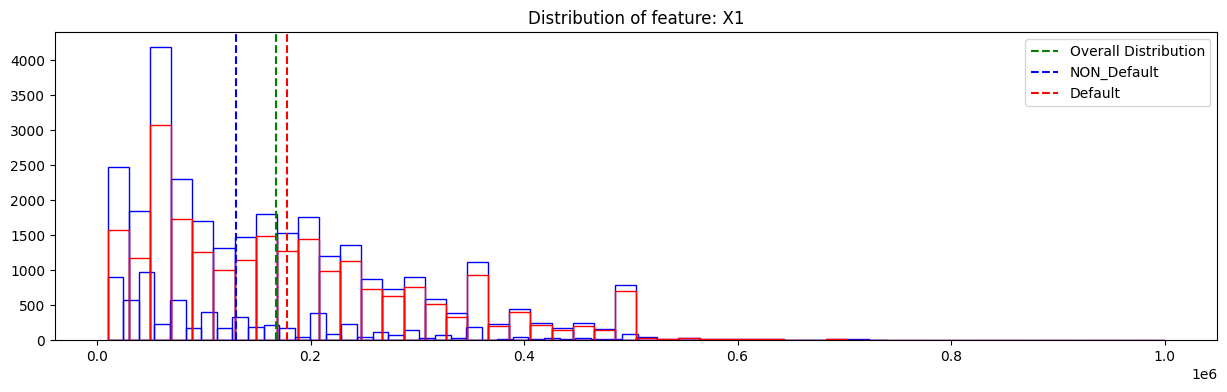

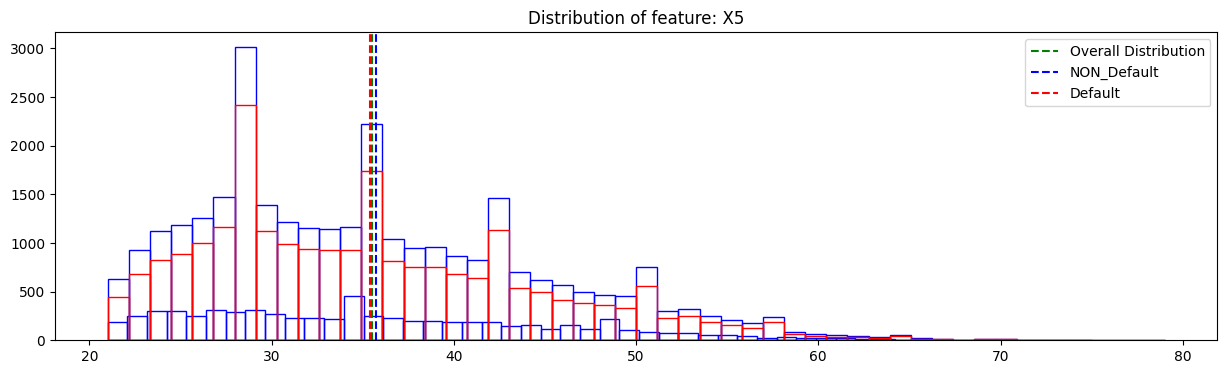

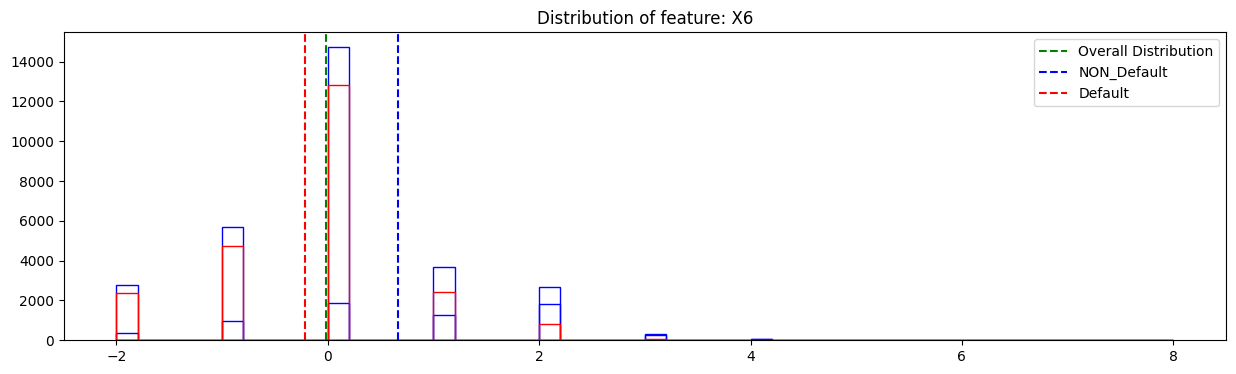

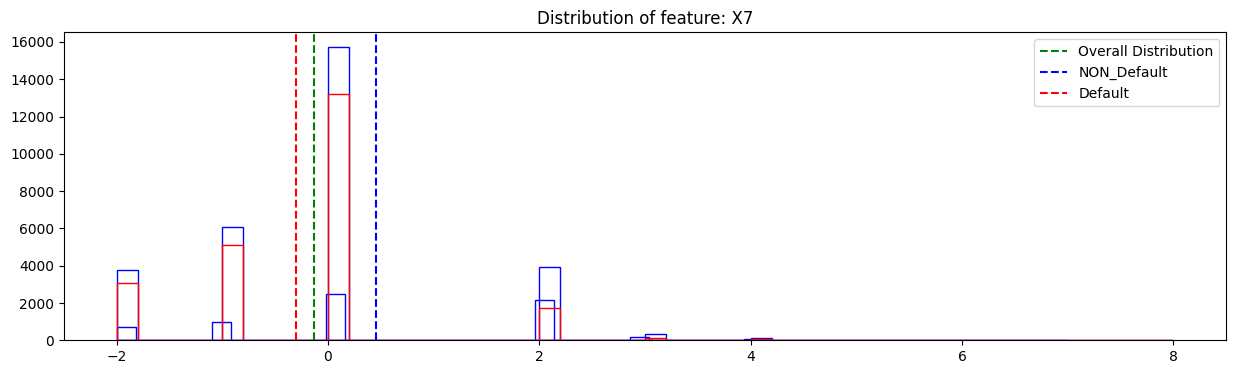

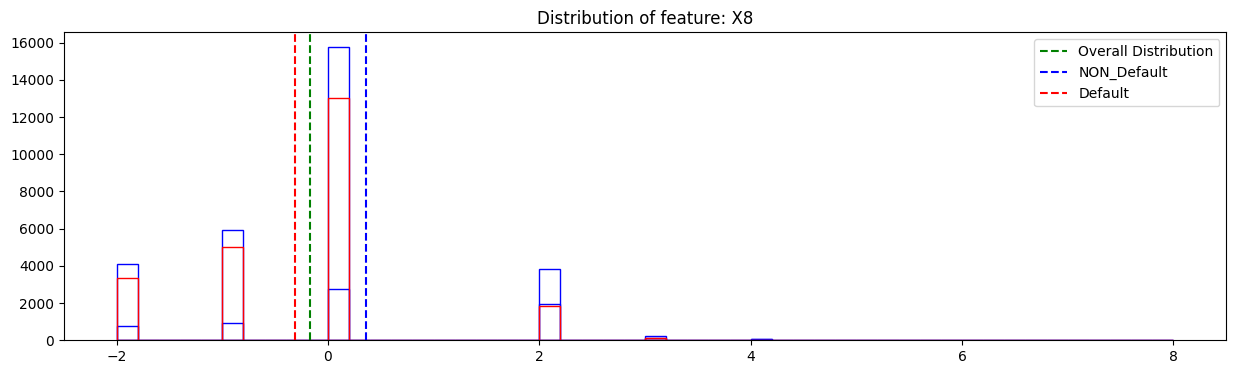

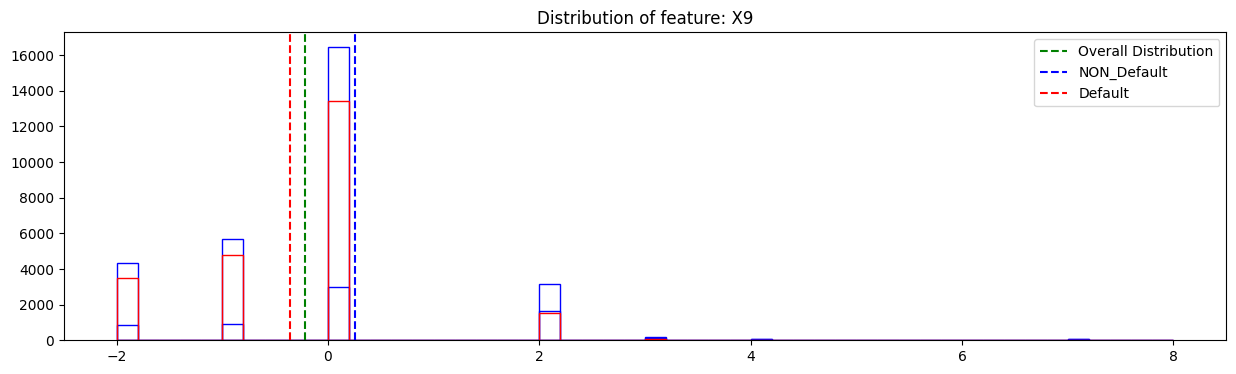

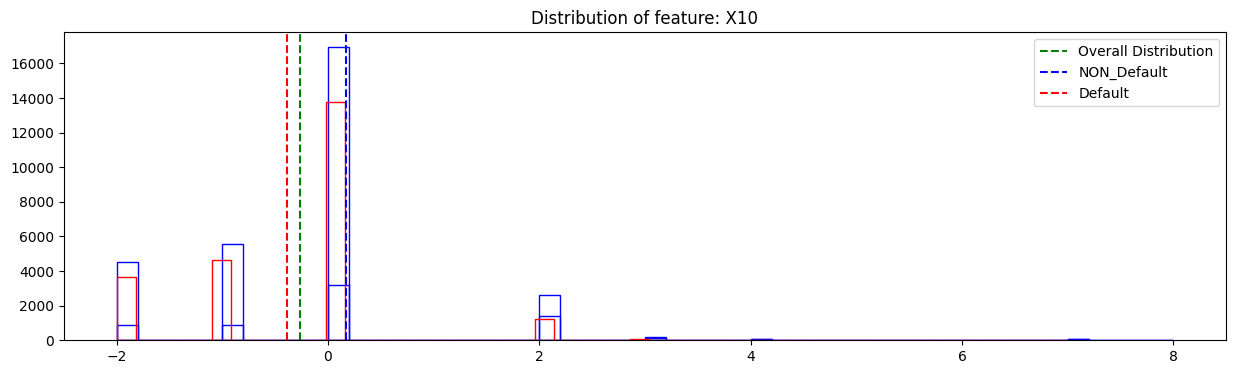

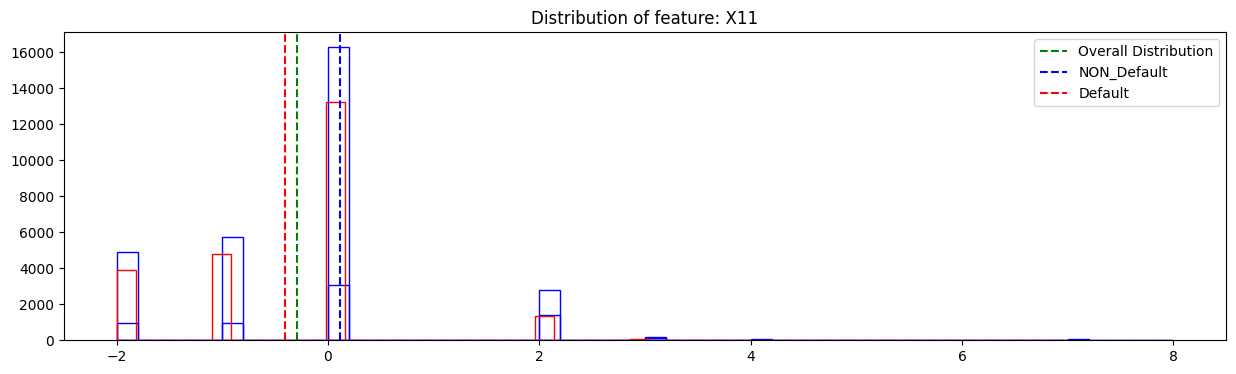

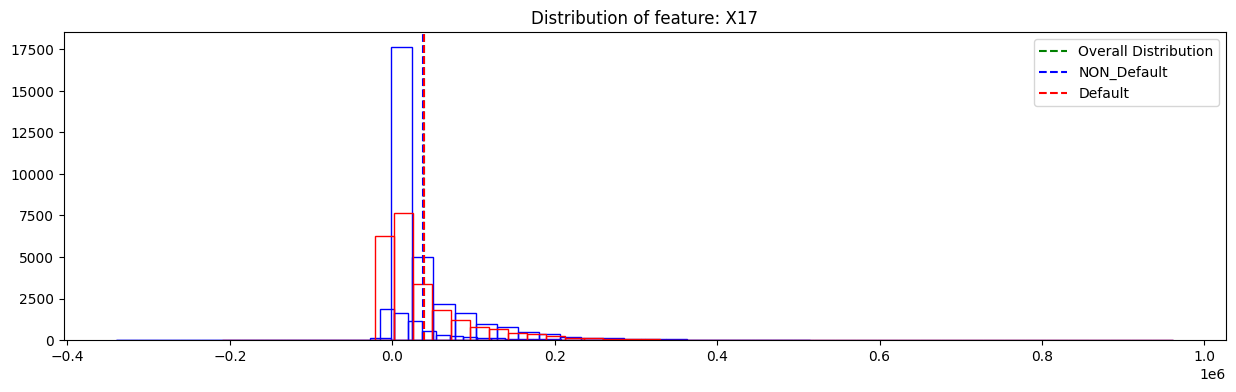

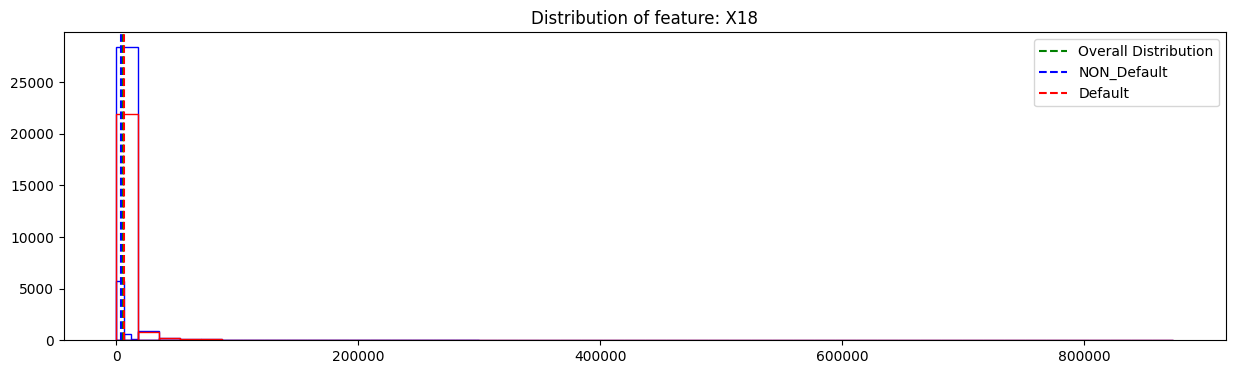

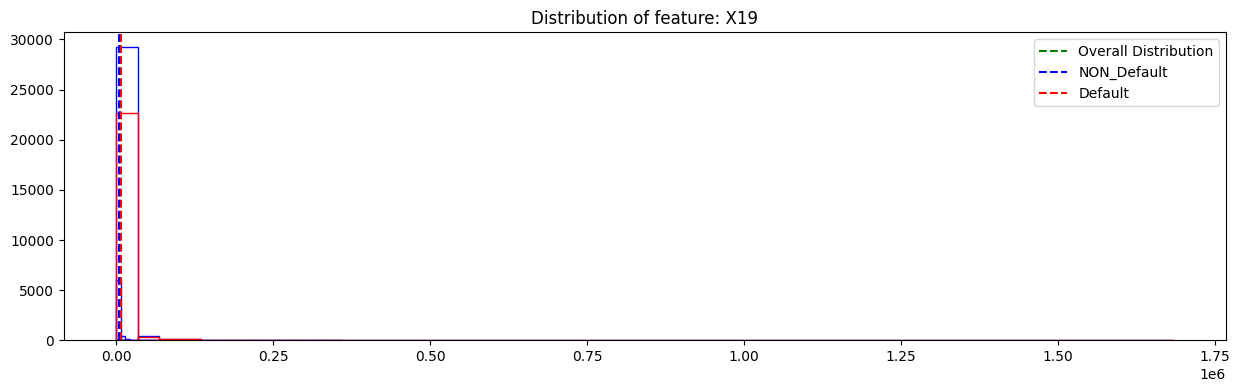

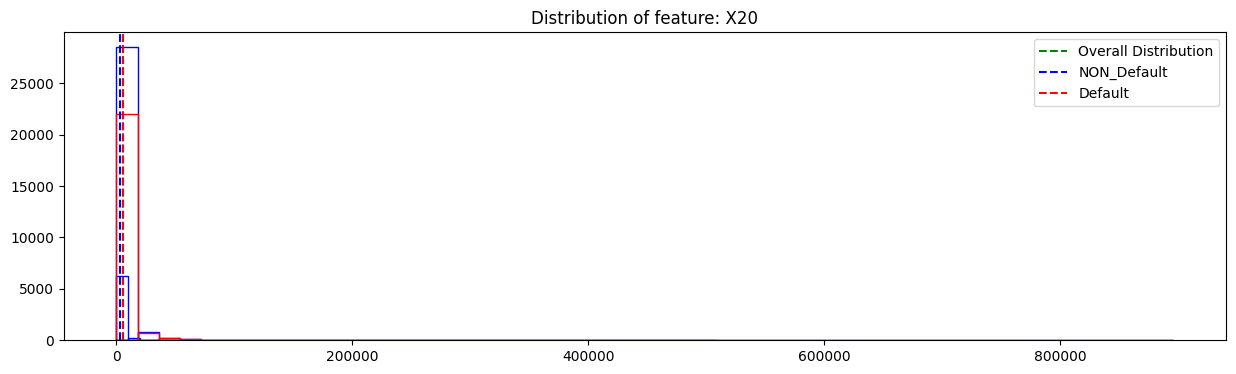

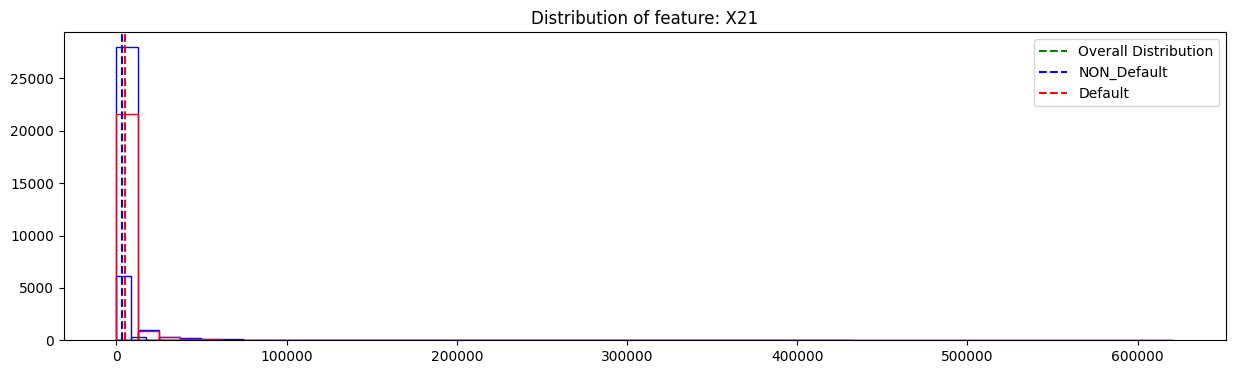

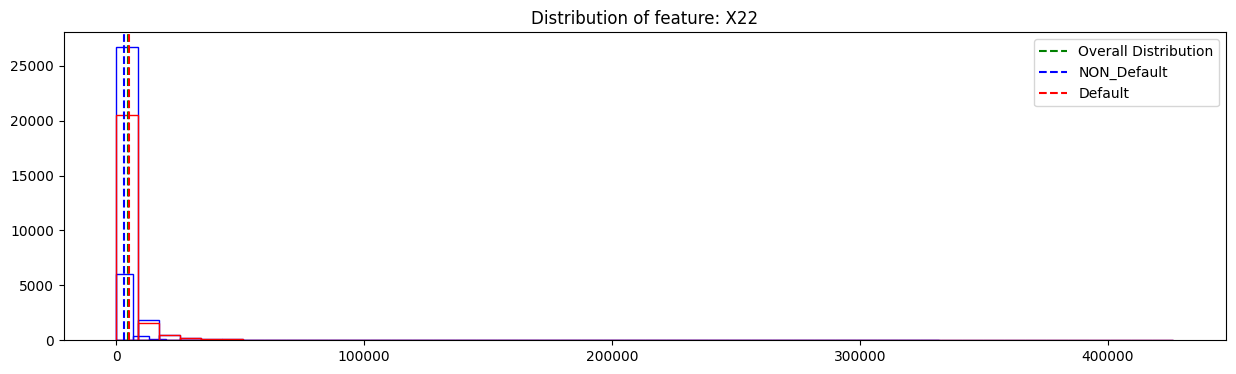

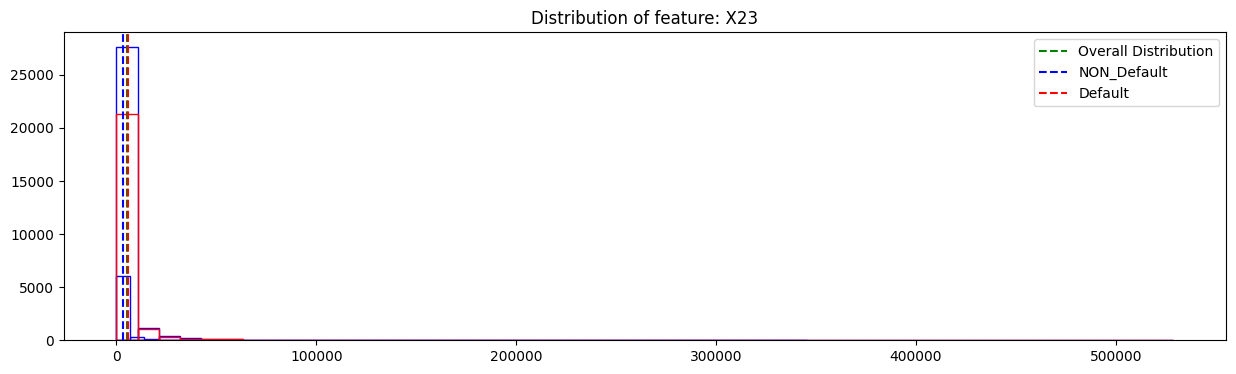

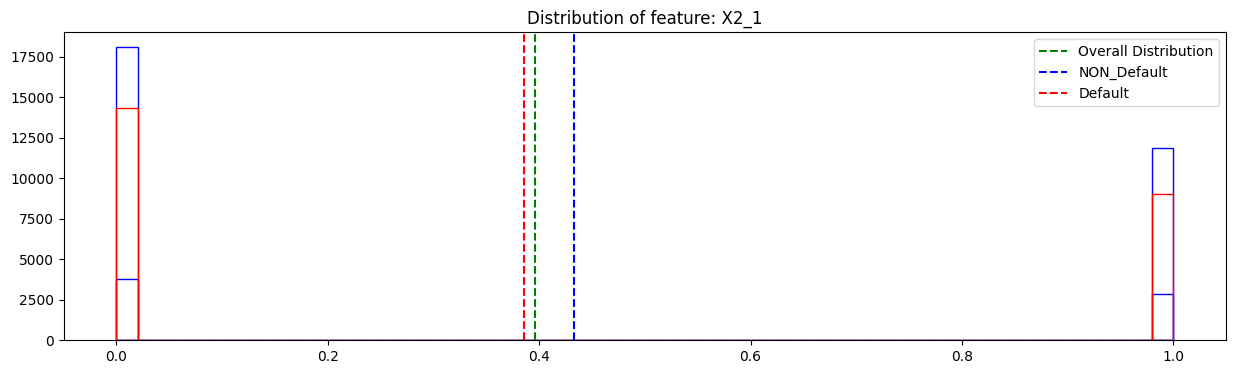

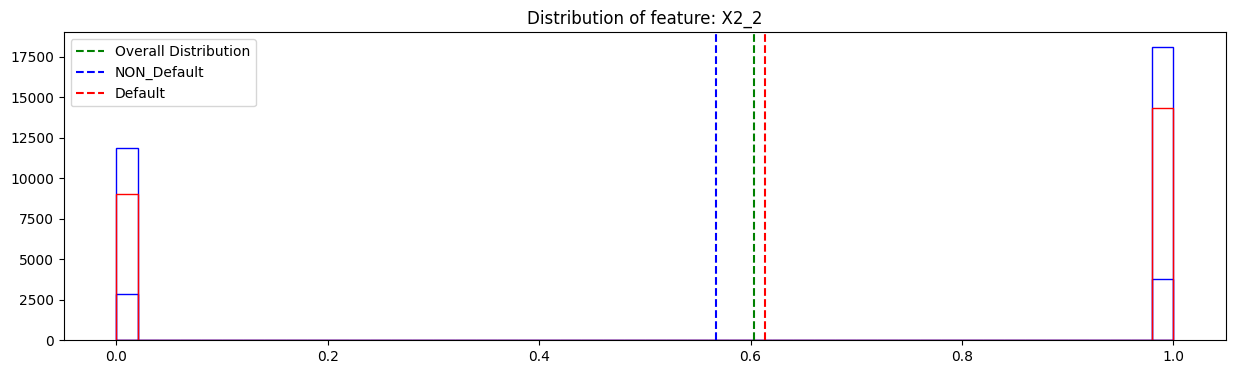

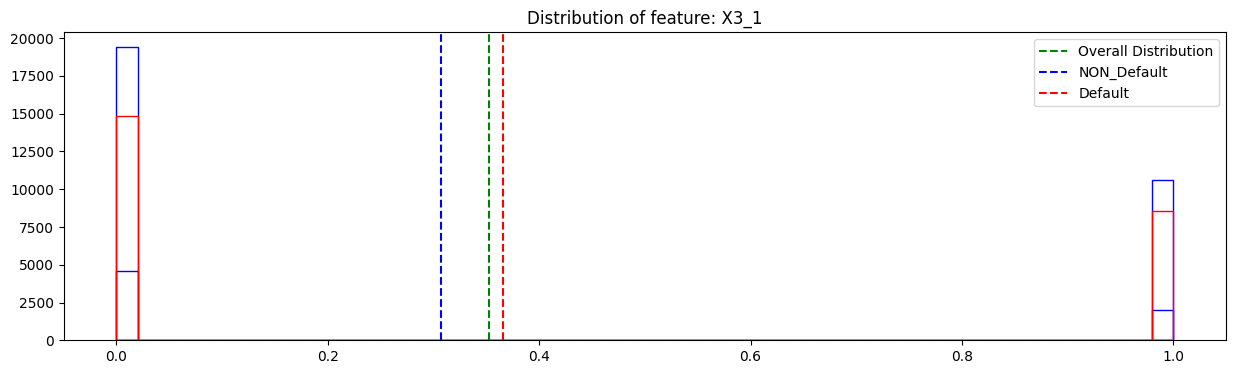

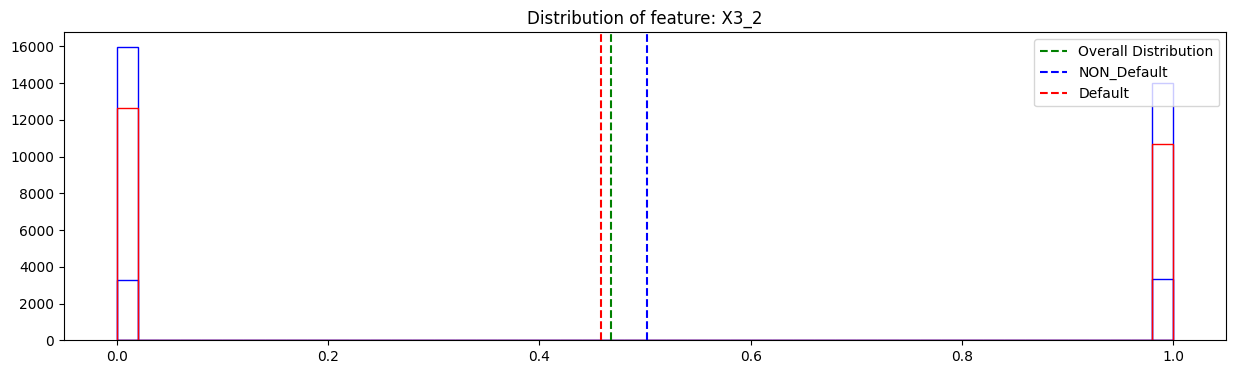

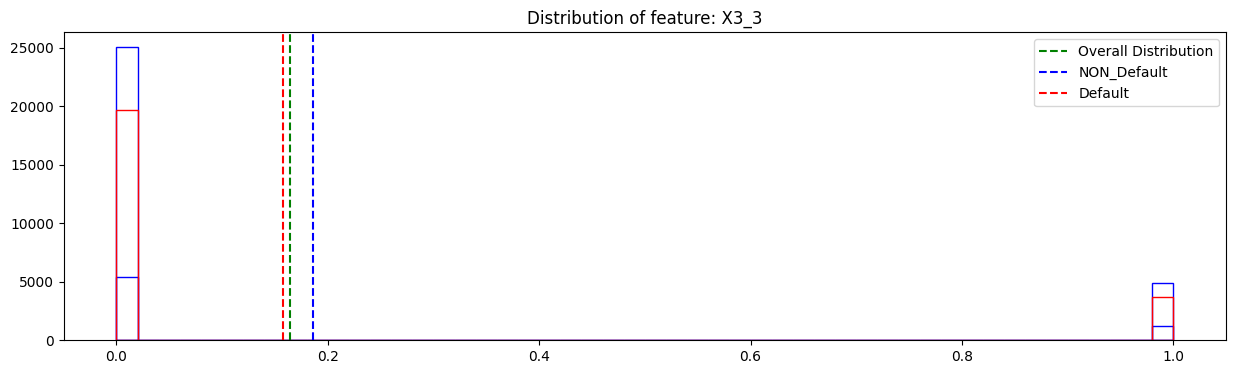

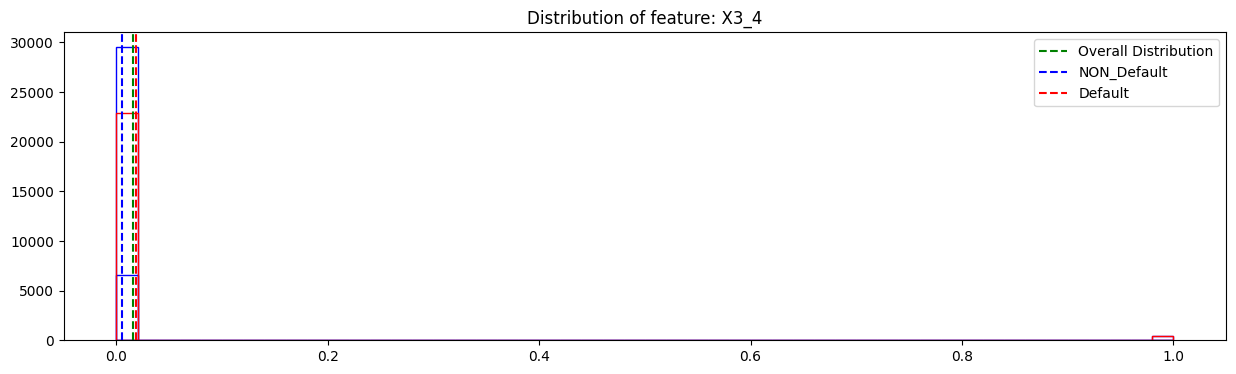

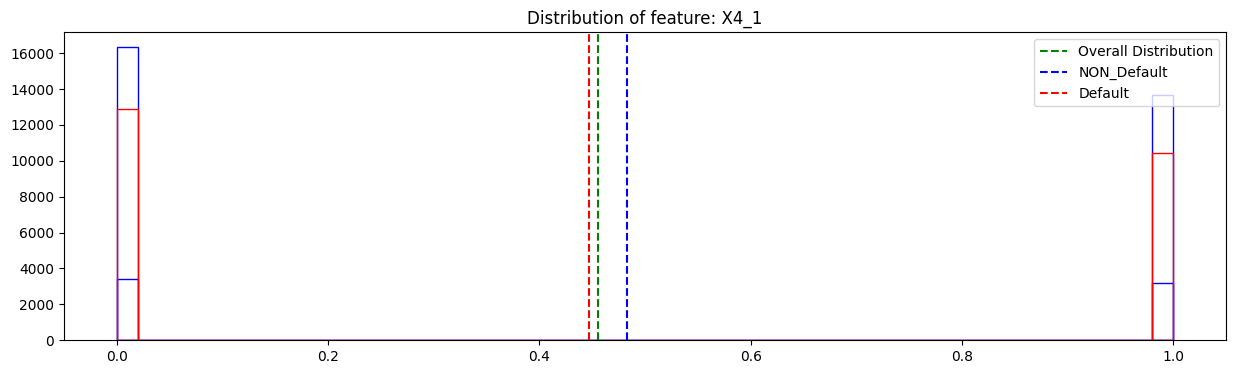

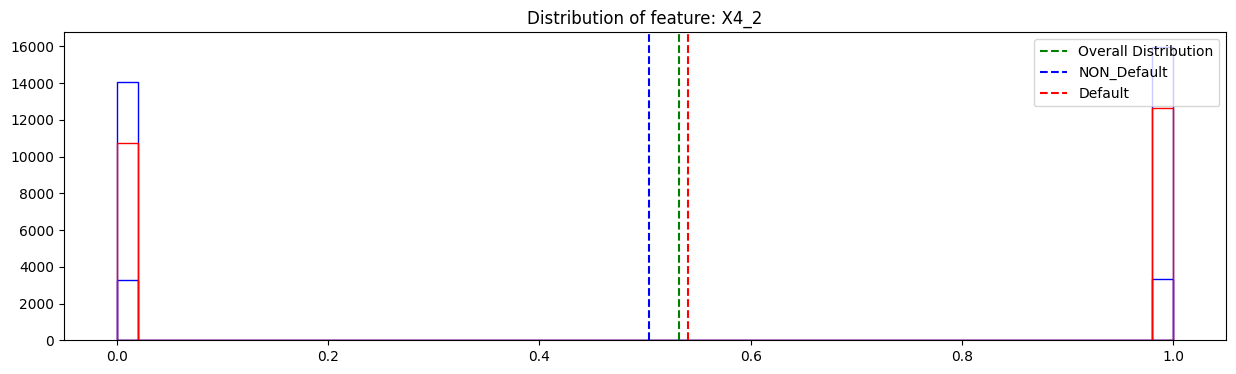

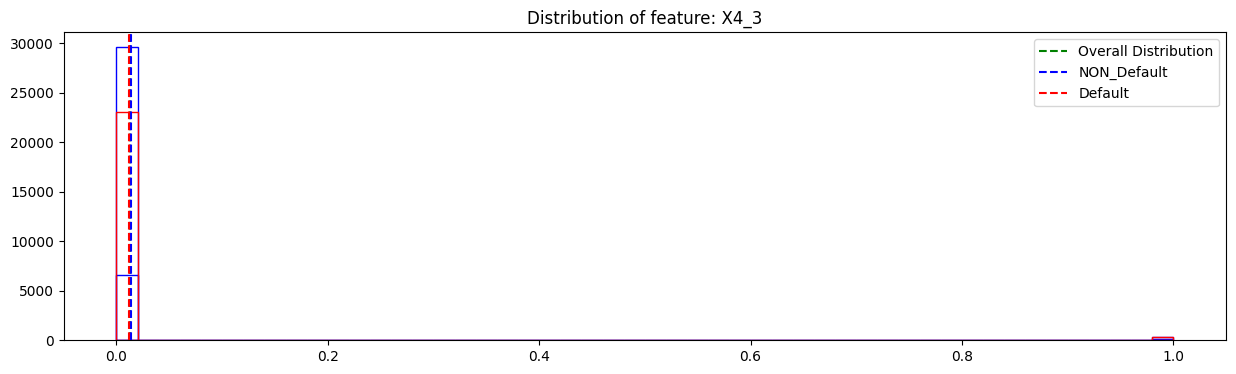

In [24]:
features = [f for f in df.columns if f != "Y"]
for f in features:
    plt.figure(figsize=(15, 4 ))
    plt.hist(df[f],edgecolor="blue", bins=50, fill = False)
    plt.hist(df[f][df["Y"]==1],edgecolor="blue", bins=50, fill = False)
    plt.hist(df[f][df["Y"]==0],edgecolor="red", bins=50, fill = False)
    
    plt.axvline(x=df[f].mean(), color='green', linestyle='--', label='Mean (default)')
    plt.axvline(x=df[f][df["Y"]==1].mean(), color='blue', linestyle='--', label='Mean (default)')
    plt.axvline(x=df[f][df["Y"]==0].mean(), color='red', linestyle='--', label='Mean (no default)')
    
    plt.legend(["Overall Distribution",'NON_Default', 'Default'], loc='best')
    plt.xlabel('')
    plt.title('Distribution of feature: ' + f)

plt.show()        

The histograms provide 3 distributions : 1- Overall Distribution 2- Default Cases 3- Non-Default Cases. In these histagrams ,we can see the distribution of values for each class. If the histograms exhibit distinct peaks,different means or separate clusters, it suggests that the feature has different characteristics for default and non-default cases. The differnece in the distribution can be indicative of the feature's ability to discriminate between the two classes.For example, distribution of features X1,X6,X7,X8,X9,X10, X11, X2_1,X2_2,X3_1,X3_2,X3_3,X4_1,X4_2 have a clear separation between default and non-default cases, it implies that these features can potentially be a strong indicator for non-default detection. On the other hand, if the histograms overlap significantly or show similar distributions, it suggests that the feature may not provide much discriminatory information.

#### Classification Models

In [34]:
def model(xtrain, ytrain, machineLearningModel, param_grid):
    ml = machineLearningModel()
    
    grid_search_object = GridSearchCV(
        ml, param_grid, cv=5, scoring='f1',
        return_train_score=True, n_jobs=-1, refit=True)
    
    grid_search_object.fit(xtrain, ytrain)
    
    # Get the best model
    best_ml = grid_search_object.best_estimator_
    
    # Get the best score and parameters
    best_score = grid_search_object.best_score_
    best_parameters = grid_search_object.best_params_
    
    # Get the mean train and validation scores for each parameter set
    train_scores = grid_search_object.cv_results_['mean_train_score']
    val_scores = grid_search_object.cv_results_['mean_test_score']
    
    # Calculate the errors
    train_errors = 1 - train_scores
    val_errors = 1 - val_scores
    
    # Find the best index
    best_index = grid_search_object.best_index_
    
    # Retrieve train and validation errors for the best parameters
    best_train_error = train_errors[best_index]
    best_val_error = val_errors[best_index]
    
    return best_score,best_parameters,best_train_error,best_val_error

In [26]:
def prediction(x_train, y_train, x_test, y_test, model):
    # Scaling the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_train_scaled_df = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
    x_test_scaled = scaler.transform(x_test)
    x_test_scaled_df = pd.DataFrame(data=x_test_scaled, columns=x_train.columns)
    
    # Fitting the model
    model.fit(x_train_scaled_df, y_train)
    y_pred = model.predict(x_test_scaled_df)
    
    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # 2. Precision (for binary classification)
    precision = precision_score(y_test, y_pred)
    # 3. Recall (for binary classification)
    recall = recall_score(y_test, y_pred)
    # 4. F1-Score
    f1 = f1_score(y_test, y_pred)
    # 5. Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # 6. Detailed Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Results as a DataFrame
    eval_result = pd.DataFrame({
        "accuracy": [accuracy],
        "precision": [precision],
        "recall": [recall],
        "f1": [f1]
    })
    
    return eval_result, conf_matrix, class_report
    

##### Decision Tree Classifier

In [30]:
# dont need normalization
# feature importance
x_train_dt = X_train.copy()
y_train_dt = Y_train.copy()

tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree.fit(x_train_dt,y_train_dt)
columns = x_train_dt.columns.values
importance = tree.feature_importances_
c_imp = {}

# Populate dictionary
for col,imp in zip(columns,importance):
    c_imp[col] = imp

# Print in descending order
for col, imp in reversed(sorted(c_imp.items(), key=operator.itemgetter(1))):
    print (col,':',imp)

X6 : 0.6835712072278628
X7 : 0.16549258112498613
X20 : 0.07181498036569477
X1 : 0.03840365749363096
X11 : 0.017642756937427433
X21 : 0.008636807083182901
X8 : 0.006499688604860035
X3_4 : 0.0038816842522847216
X19 : 0.0021390048264714983
X18 : 0.001917632083598592
X4_3 : 0.0
X4_2 : 0.0
X4_1 : 0.0
X3_3 : 0.0
X3_2 : 0.0
X3_1 : 0.0
X2_2 : 0.0
X2_1 : 0.0
X23 : 0.0
X22 : 0.0
X17 : 0.0
X10 : 0.0
X9 : 0.0
X5 : 0.0


In [35]:
feature_important = ['X6','X7','X20','X1','X11','X21']
x_train_dt = X_train[feature_important].copy()
y_train_dt = Y_train.copy()
x_test_dt = X_test[feature_important].copy()

k_range = list(range(1, 50)) # Define the range of k values to test
param_grid = {'n_neighbors': k_range} # Set up the hyperparameter grid
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

dt_best_score, dt_best_parameters,dt_best_train_error, dt_best_val_error =  model(
                                                x_train_dt_norm,
                                                y_train_dt,
                                                DecisionTreeClassifier, 
                                                param_dist)

dt_best_score, dt_best_parameters,dt_best_train_error, dt_best_val_error

(0.48058168423791797,
 {'criterion': 'gini',
  'max_depth': 4,
  'max_features': 3,
  'min_samples_leaf': 9},
 0.5158519453461355,
 0.519418315762082)

I initially used a Decision Tree model to explore how the data behaves. The model's F1 score was low, indicating poor performance. The gap between validation error and training error was minimal, suggesting that the model is neither significantly overfitting nor underfitting. In the next sections, I will explore the data further using Gaussian Mixture Models (GMM).

#### GMM - part one : a single feature, full training dataset , n_components = 1

In [36]:
def gmm(x_train_fit , x_train, x_val, feature, k):
    
    """"
    use Gaussian Mixture with k components and one feature
    to calculate log likelihhod
    """
    
    gm = GaussianMixture(n_components = k,random_state=0 )
    gm.fit(x_train_fit[feature])
    train_scores = gm.score_samples(x_train[feature])
    val_scores = gm.score_samples(x_val[feature])
    return train_scores , val_scores

In [37]:
def threshold(x_train_fit, x_train, x_val,y_val, feature, k):
    
    """"
    calculate threshold based on the max f1 
    """
    train_scores , val_scores = gmm(x_train_fit,x_train, x_val, feature, k)
    sorted_vscores = np.sort(val_scores)
    f1_scores_list = []
    threshold_list = []
    for i in range(len(sorted_vscores)-1):
        final_thre = (sorted_vscores[i] + sorted_vscores[i+1]) / 2
        predicted_labels = (val_scores < final_thre).astype(int)
        f1 = f1_score(y_val, predicted_labels)
        f1_scores_list.append(f1)
        threshold_list.append(final_thre)
        
    max_f1_index = np.argmax(f1_scores_list)
    optimal_threshold = threshold_list[max_f1_index]
    return optimal_threshold

Here I fit a single Gaussian distribution on a single feature of the full training dataset (both classes) using sklearn.mixture.GaussianMixture when n_components=1, and define a threshold, to find the highest f1_score. 

In [38]:
aucScores ={}

k = 1 
features=[f for f in x_train.columns if not 'Unnamed: 0' in f]
for feature in features:
    feat = [feature]
    train_scores , val_scores = gmm(x_train, x_train, x_val, feat, k)
    final_thre = threshold(x_train, x_train, x_val,y_val, feat, k)
    
    pred_train = (train_scores < final_thre).astype(int)
    pred_val = (val_scores < final_thre).astype(int)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_val = roc_auc_score(y_val, pred_val)
    aucScores[feature] = {'train': auc_train, 'val': auc_val}

auc_table = pd.DataFrame.from_dict(aucScores, orient='index')
auc_table.columns = ['AUC Train', 'AUC Validation']
auc_table

,AUC Train,AUC Validation
X1,0.508947,0.516648
X5,0.502124,0.496850
X6,0.660080,0.659755
X7,0.643649,0.652572
X8,0.620095,0.637366
X9,0.605133,0.619855
X10,0.596309,0.608058
X11,0.578759,0.581494
X17,0.499522,0.500168
X18,0.528271,0.533963


The area under the ROC curve (AUC-ROC) represents the overall performance of a model in distinguishing between positive and negative classes. It provides a measure of the model's ability to correctly classify instances from both classes, independent of the chosen threshold. In this analysis, we computed the AUC for both the training and validation sets to assess whether the model is overfitting or generalizing well to unseen data. If the AUC-ROC for the training set is significantly higher than that for the validation set, it could indicate overfitting, suggesting that the model is memorizing the training data rather than capturing general patterns. In our results, there isn't a significant difference between AUC for the training and validation sets. However, for most features, the AUC is equal to or less than 0.5, which means the model performs no better than a random classifier. Notably, for features X6, X7, X8,  X9,and X10 the AUC is greater than 0.5, indicating that the model is performing better than a random classifier for these features.

#### GMM - part two, single feature, non default dataset, n_components = 1

In [39]:
aucScores ={}
x_train_nondef = x_train[y_train["Y"] == 0]
k = 1 

for feature in features:
    feat = [feature]
    train_scores , val_scores = gmm(x_train_nondef, x_train, x_val,  feat, k)
    final_thre = threshold(x_train_nondef, x_train, x_val,y_val,  feat, k)
    
    pred_train = (train_scores < final_thre).astype(int)
    pred_val = (val_scores < final_thre).astype(int)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_val = roc_auc_score(y_val, pred_val)
    aucScores[feature] = {'train': auc_train, 'val': auc_val}

auc_table2 = pd.DataFrame.from_dict(aucScores, orient='index')
auc_table2.columns = ['AUC Train', 'AUC Validation']
auc_table2

,AUC Train,AUC Validation
X1,0.527539,0.530535
X5,0.502124,0.496850
X6,0.660080,0.659755
X7,0.643649,0.652572
X8,0.620095,0.637366
X9,0.605133,0.619855
X10,0.596309,0.608058
X11,0.578759,0.581494
X17,0.500236,0.500168
X18,0.525761,0.533983


The results of the first part is similar to part two because the GMM may consider instances from the other class as outliers because they do not conform to the learned Gaussian distribution. As a result, the performance metrics, such as AUC train, AUC validation, F1 score, and threshold, may remain the same since the model is not effectively capturing the characteristics of the other class.

#### GMM- part three- multiple features

plot the scatter plot of two features with high Auc to see how many components are required to fit the data.

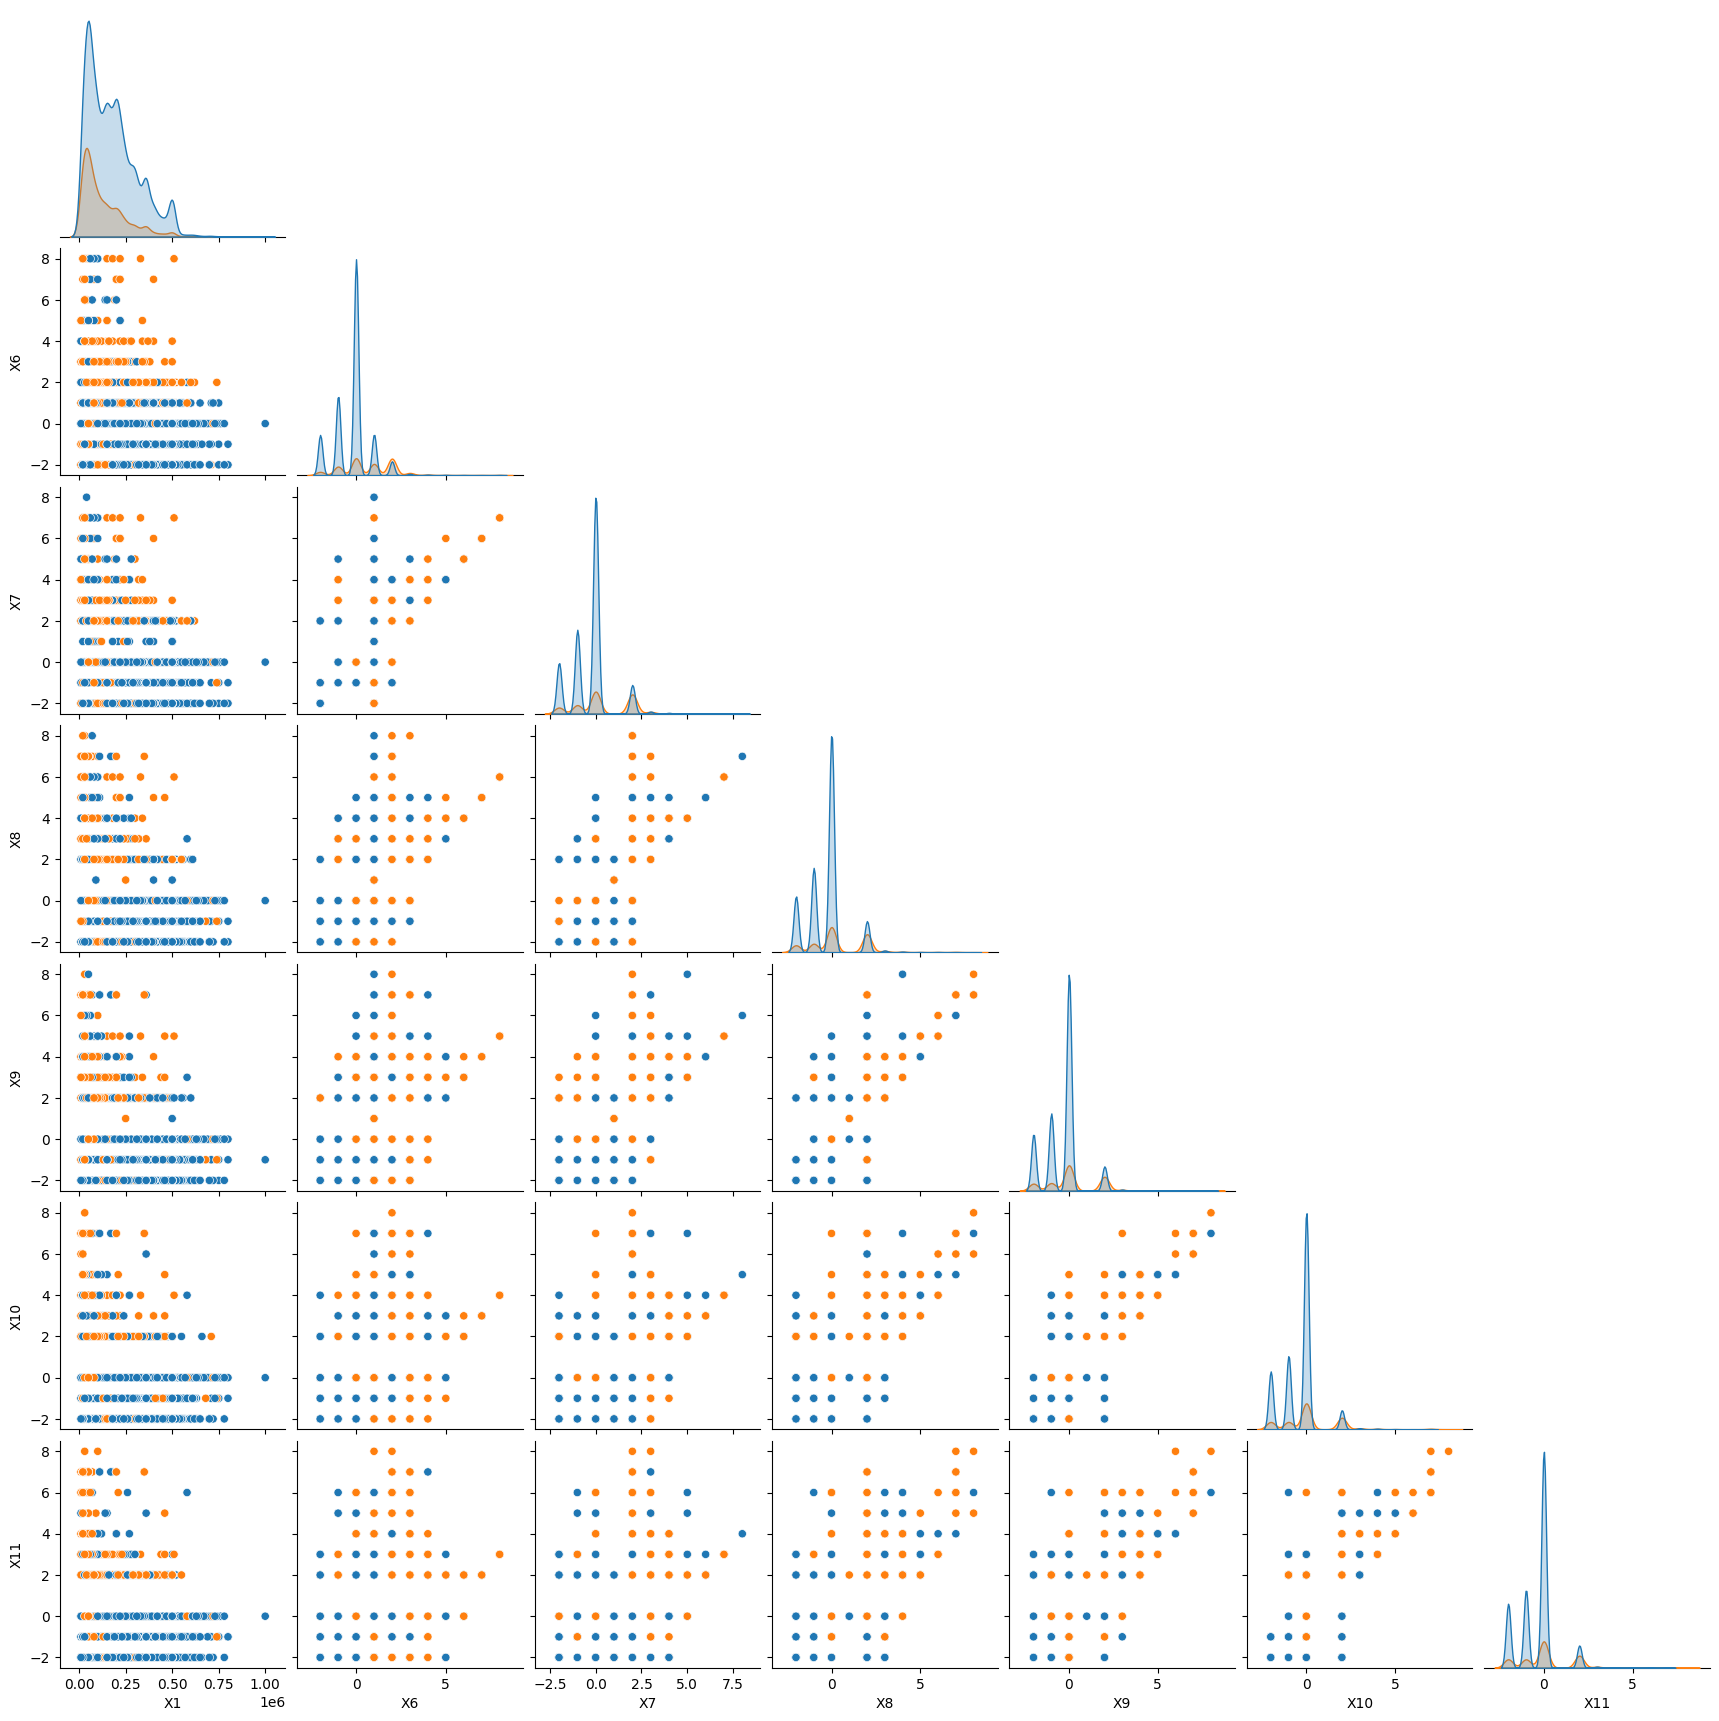

In [40]:
pair_plot = sns.pairplot(df[["X1",'X6','X7','X8','X9','X10','X11','Y']], hue='Y', diag_kind='kde', corner=True)
pair_plot._legend.remove()

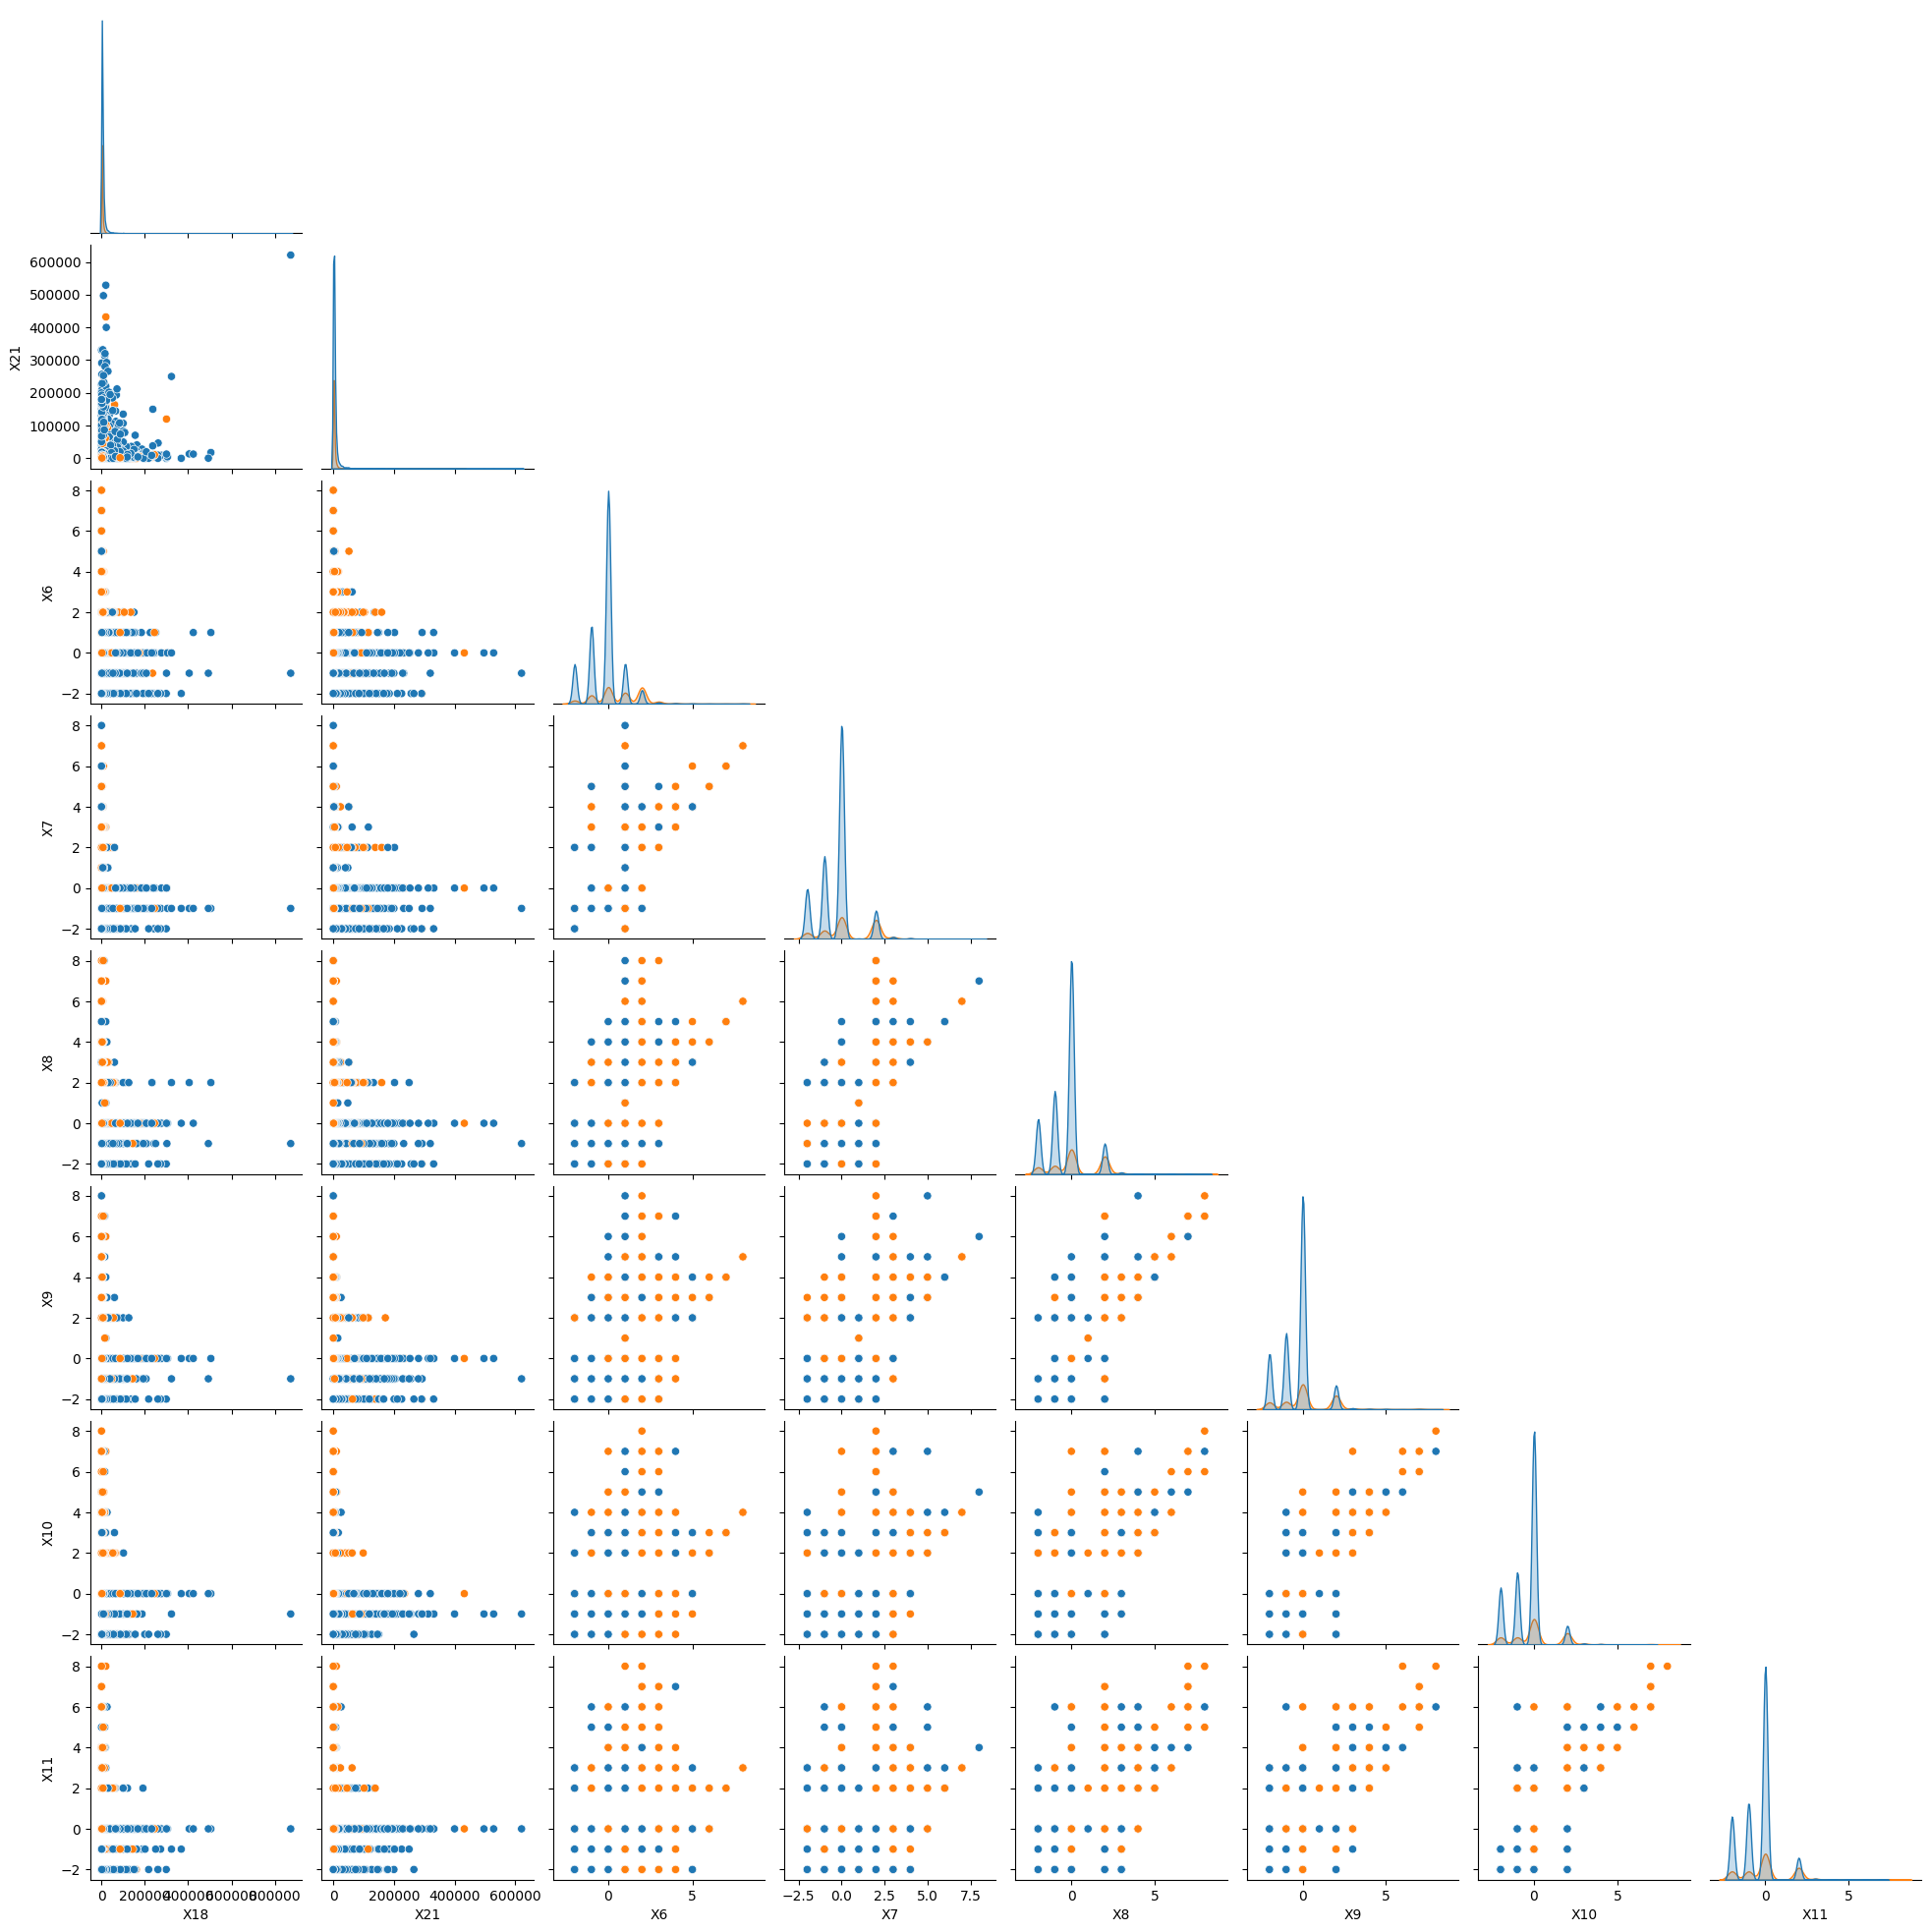

In [41]:
pair_plot = sns.pairplot(df[["X18","X21",'X6','X7','X8','X9','X10','X11','Y']], hue='Y', diag_kind='kde', corner=True)
pair_plot._legend.remove()

In [42]:
auctrain =[]
aucval = []
k = 4
# create pairs of features 
feature =['X6','X7','X8','X9','X10','X11']
features = []
for i, f in enumerate(feature):
    for j in range(i + 1, len(feature)):
        features_pair = [f, feature[j]]
        features.append(features_pair)

for feature in features:
    train_scores , val_scores = gmm(x_train, x_train, x_val, feature, k)
    final_thre = threshold(x_train, x_train, x_val,y_val, feature, k)
    
    pred_train = (train_scores < final_thre).astype(int)
    pred_val = (val_scores < final_thre).astype(int)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_val = roc_auc_score(y_val, pred_val)
    auctrain.append(auc_train)
    aucval.append(auc_val)

auc_table3 = pd.DataFrame({"feature" : features, "Auc_Train":auctrain,"AUC Validation": aucval })
auc_table3

,feature,Auc_Train,AUC Validation
0,"[X6, X7]",0.679516,0.682158
1,"[X6, X8]",0.651116,0.656814
2,"[X6, X9]",0.623423,0.630368
3,"[X6, X10]",0.621481,0.628193
4,"[X6, X11]",0.666006,0.671193
5,"[X7, X8]",0.588673,0.601375
6,"[X7, X9]",0.654869,0.657791
7,"[X7, X10]",0.595260,0.598009
8,"[X7, X11]",0.600463,0.600141
9,"[X8, X9]",0.572396,0.583389


In [43]:
auctrain =[]
aucval = []
k = 4
feature =['X7','X8','X10','X11']
features = []
for i, f in enumerate(feature):
    for j in range(i + 1, len(feature)):
        for k in range (i + 2, len(feature)):
            features_pair = [f, feature[j],feature[k]]
            features.append(features_pair)

for feature in features:
    train_scores , val_scores = gmm(x_train, x_train, x_val, feature, k)
    final_thre = threshold(x_train, x_train, x_val,y_val, feature, k)
    
    pred_train = (train_scores < final_thre).astype(int)
    pred_val = (val_scores < final_thre).astype(int)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_val = roc_auc_score(y_val, pred_val)
    auctrain.append(auc_train)
    aucval.append(auc_val)

auc_table4 = pd.DataFrame({"feature" : features, "Auc_Train":auctrain,"AUC Validation": aucval })
auc_table4

,feature,Auc_Train,AUC Validation
0,"[X7, X8, X10]",0.645105,0.650804
1,"[X7, X8, X11]",0.635014,0.642472
2,"[X7, X10, X10]",0.607469,0.608410
3,"[X7, X10, X11]",0.642895,0.645629
4,"[X7, X11, X10]",0.642895,0.645629
5,"[X7, X11, X11]",0.604755,0.599959
6,"[X8, X10, X11]",0.589017,0.595229
7,"[X8, X11, X11]",0.589235,0.596471


adding more features and number of components have not improved the model performance.

#### two Gaussian Mixuter, multiple features, different components choosing threshold

In [44]:
# fit the model all train data components 1 to 6, multi features

x_train_all = x_train[["X6", "X7", "X8", "X9", "X10","X11"]]

results = []

for num_features in range(1, 8):
    
    for num_components in range(1, 6):
        
        selected_features = x_train_all.columns[:num_features]
        
        x_train_subset = x_train_all[selected_features]
           
        x_val_subset = x_val[selected_features]        
     
      
        gmm_all =  GaussianMixture(n_components= num_components, random_state=0)
        gmm_all.fit(x_train_subset)
        y_pred = gmm_all.predict(x_val_subset)

        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        results.append((num_features, num_components, precision, recall, f1))

columns = ["Num Features", "Num Components", "Precision", "Recall", "F1 Score"]
df_results_all = pd.DataFrame(results, columns=columns)
df_results_all

,Num Features,Num Components,Precision,Recall,F1 Score
0,1,1,0.606566,0.778824,0.681986
1,1,2,0.804390,0.820392,0.794924
2,1,3,0.791705,0.545098,0.639569
3,1,4,0.837343,0.504052,0.627807
4,1,5,0.837972,0.494118,0.618414
5,2,1,0.606566,0.778824,0.681986
6,2,2,0.722545,0.717908,0.720157
7,2,3,0.781988,0.524706,0.627985
8,2,4,0.789536,0.507712,0.615427
9,2,5,0.807640,0.501438,0.618373


In [45]:
max(df_results_all["F1 Score"])

0.794923677836088

In [46]:
# fit the model with non-default train data components 1 to 6, multi features

x_train_nondef = x_train.loc[y_train["Y"] == 0, ["X6", "X7", "X8", "X9", "X10", "X11"]]

results = []

for num_features in range(1, 8):
    
    for num_components in range(1, 6):
        
        selected_features = x_train_nondef.columns[:num_features]
        
        x_trainnondef = x_train_nondef[selected_features]
           
        x_val_subset = x_val[selected_features]        
     
      
        gmm_def =  GaussianMixture(n_components= num_components, random_state=0)
        gmm_def.fit(x_trainnondef)
        y_pred = gmm_def.predict(x_val_subset)

        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        results.append((num_features, num_components, precision, recall, f1))

columns = ["Num Features", "Num Components", "Precision", "Recall", "F1 Score"]
df_results_nondef = pd.DataFrame(results, columns=columns)
df_results_nondef 

,Num Features,Num Components,Precision,Recall,F1 Score
0,1,1,0.606566,0.778824,0.681986
1,1,2,0.629274,0.712680,0.663392
2,1,3,0.720517,0.476601,0.569322
3,1,4,0.724263,0.464575,0.565382
4,1,5,0.724263,0.464575,0.565382
5,2,1,0.606566,0.778824,0.681986
6,2,2,0.629274,0.712680,0.663392
7,2,3,0.620036,0.552418,0.581442
8,2,4,0.712790,0.427190,0.533590
9,2,5,0.709693,0.439216,0.541737


In [47]:
# fit the model with default class, components 1 to 6 , multi feature
x_train_def = x_train.loc[y_train["Y"] == 1, ["X6","X7", "X8", "X9", "X10", "X11"]]


results = []

for num_features in range(1, 8):
    
    for num_components in range(1, 6):
        
        selected_features = x_train_def.columns[:num_features]
        
        x_traindef = x_train_def[selected_features]
    
        x_val_subset = x_val[selected_features]        
     
      
        gmm_nondef =  GaussianMixture(n_components= num_components, random_state=0)
        gmm_nondef.fit(x_traindef)
        y_pred = gmm_nondef.predict(x_val_subset)

        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        results.append((num_features, num_components, precision, recall, f1))

columns = ["Num Features", "Num Components", "Precision", "Recall", "F1 Score"]
df_results_def = pd.DataFrame(results, columns=columns)
df_results_def 

,Num Features,Num Components,Precision,Recall,F1 Score
0,1,1,0.606566,0.778824,0.681986
1,1,2,0.778968,0.774118,0.776404
2,1,3,0.756277,0.343791,0.449894
3,1,4,0.801915,0.302745,0.438132
4,1,5,0.802544,0.292810,0.428739
5,2,1,0.606566,0.778824,0.681986
6,2,2,0.780059,0.798954,0.784703
7,2,3,0.718622,0.676863,0.693142
8,2,4,0.659034,0.259608,0.371829
9,2,5,0.798842,0.694902,0.740012


The results indicate that using only one feature, X6, provides reasonable performance, but relying on a single feature might oversimplify the data. Feature importance analysis using the Decision Tree model shows that X6 and X7 are the most important features, together explaining approximately 85% of the target variable. Additionally, the df_results_def shows that the F1 score is highest when using two components with these two features (X6 and X7). Based on this analysis, for  prediction I am using both X6 and X7 as features along with two components to achieve better performance.

In [54]:
x_train_dt_fit_gm = x_train.loc[y_train["Y"] == 1, ["X6","X7"]]
x_test_dt_gm = X_test[["X6","X7"]]

  
    # Fitting the model
gmm_nondef =  GaussianMixture(n_components= 2, random_state=0)    
gmm_nondef.fit(x_train_dt_fit_gm)
y_pred_gm = gmm_nondef.predict(x_test_dt_gm)
    
    # 1. Accuracy
# accuracy = accuracy_score(y_test, y_pred) data is not balanced
    # 2. Precision (for binary classification)
precision_gm = precision_score(Y_test, y_pred_gm, average='weighted')
    # 3. Recall (for binary classification)
recall_gm = recall_score(Y_test, y_pred_gm, average='weighted')
    # 4. F1-Score
f1_gm = f1_score(Y_test, y_pred_gm, average='weighted')
    # 5. Confusion Matrix
conf_matrix_gm = confusion_matrix(Y_test, y_pred_gm)
    # 6. Detailed Classification Report
class_report_gm = classification_report(Y_test, y_pred_gm)
    
    # Results as a DataFrame
eval_result_gm = pd.DataFrame({
        "precision": [precision_gm],
        "recall": [recall_gm],
        "f1": [f1_gm]
    })

eval_result_gm

,precision,recall,f1
0,0.775468,0.796444,0.780058


##### Logestic Regression

In [ ]:
X_train, X_test, Y_train, Y_test


In [55]:
scalar = StandardScaler()
scalar.fit(X_train)
xtrain_norm = pd.DataFrame(data=scalar.transform(X_train), columns=X_train.columns)
xtest_norm = pd.DataFrame(data=scalar.transform(X_test), columns=X_train.columns)

param_grid = {'C': [0.001,0.01,0.05,0.1,0.5,1,5,10, 100],
             "solver" : ['newton-cg','lbfgs','liblinear','sag']}

lg_best_score, lg_best_parameters,lg_training_error,lg_val_error = model(
                                                xtrain_norm, Y_train, LogisticRegression, param_grid)
lg_best_score, lg_best_parameters,lg_training_error,lg_val_error 

(0.35816594277197134,
 {'C': 10, 'solver': 'sag'},
 0.640413456987134,
 0.6418340572280287)

In [56]:
    # Fitting the model
lg = LogisticRegression(C = 10, solver = 'sag')    
lg.fit(xtrain_norm, Y_train)
y_pred_lg = lg.predict(xtest_norm)
    
    # 1. Accuracy
# accuracy = accuracy_score(y_test, y_pred) data is not balanced
    # 2. Precision (for binary classification)
precision_lg = precision_score(Y_test, y_pred_lg)
    # 3. Recall (for binary classification)
recall_lg = recall_score(Y_test, y_pred_lg)
    # 4. F1-Score
f1_lg = f1_score(Y_test, y_pred_lg)
    # 5. Confusion Matrix
conf_matrix_lg = confusion_matrix(Y_test, y_pred_lg)
    # 6. Detailed Classification Report
class_report_lg = classification_report(Y_test, y_pred_lg)
    
    # Results as a DataFrame
eval_result_lg = pd.DataFrame({
        "precision": [precision_lg],
        "recall": [recall_lg],
        "f1": [f1_lg]
    })

eval_result_lg

,precision,recall,f1
0,0.733533,0.246231,0.368698


In [57]:
print(conf_matrix_lg), print(class_report_lg);

[[3416   89]
 [ 750  245]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3505
           1       0.73      0.25      0.37       995

    accuracy                           0.81      4500
   macro avg       0.78      0.61      0.63      4500
weighted avg       0.80      0.81      0.78      4500



##### KNN

In [59]:
param_dist = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

knn_best_score, knn_best_parameters, knn_train_error, knn_val_error = model(
                                        xtrain_norm, Y_train, KNeighborsClassifier, param_dist)
knn_best_score, knn_best_parameters, knn_train_error, knn_val_error

(0.43508249792972553,
 {'n_neighbors': 9},
 0.4933706893011576,
 0.5649175020702745)

In [60]:
    # Fitting the model
kn = KNeighborsClassifier(n_neighbors = 9)    
kn.fit(xtrain_norm, Y_train)
y_pred_kn = kn.predict(xtest_norm)
    
    # 1. Accuracy
# accuracy = accuracy_score(y_test, y_pred) data is not balanced
    # 2. Precision (for binary classification)
precision_kn = precision_score(Y_test, y_pred_kn)
    # 3. Recall (for binary classification)
recall_kn = recall_score(Y_test, y_pred_kn)
    # 4. F1-Score
f1_kn = f1_score(Y_test, y_pred_kn)
    # 5. Confusion Matrix
conf_matrix_kn = confusion_matrix(Y_test, y_pred_kn)
    # 6. Detailed Classification Report
class_report_kn = classification_report(Y_test, y_pred_kn)
    
    # Results as a DataFrame
eval_result_kn = pd.DataFrame({
        "precision": [precision_kn],
        "recall": [recall_kn],
        "f1": [f1_kn]
    })

eval_result_kn

,precision,recall,f1
0,0.610413,0.341709,0.438144


In [61]:
print(conf_matrix_kn), print(class_report_kn);

[[3288  217]
 [ 655  340]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3505
           1       0.61      0.34      0.44       995

    accuracy                           0.81      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.78      0.81      0.78      4500

